# QUESTION ANSWERING SYSTEM (EDA and Understanding data)

### STEP1:
Load the data from either from google drive or from local machine into the data frame.
Also include necessary libraries.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

# Copy the token file from Google Drive to Colab
!cp /content/gdrive/My\ Drive/token.pickle /content/token.pickle

In [ ]:
!pip install matplotlib seaborn wordcloud

In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/Colab/MedicalQNA/medDataset_processed.csv"

df = pd.read_csv(path)

df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

-------

### STEP2: WORDCLOUD
--> Word cloud best describes the strength of most recurring words in the corpus.\
--> It's crucial to take a set of words in *Question* and *Answer* columns otherwise repeated words may affect the word cloud.\
--> NOTE that word cloud library filters out the stopwords by default during generation of the wordcloud.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


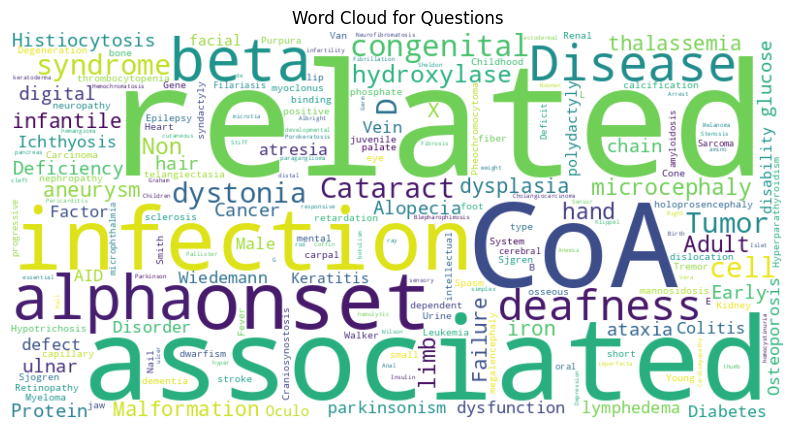

In [ ]:
from wordcloud import WordCloud


Q = df['Question'].str.cat(sep = ' ')
qwords = Q.split()
uqwords = set(qwords)
uniq_ques = ' '.join(uqwords)


# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(uniq_ques)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Questions')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


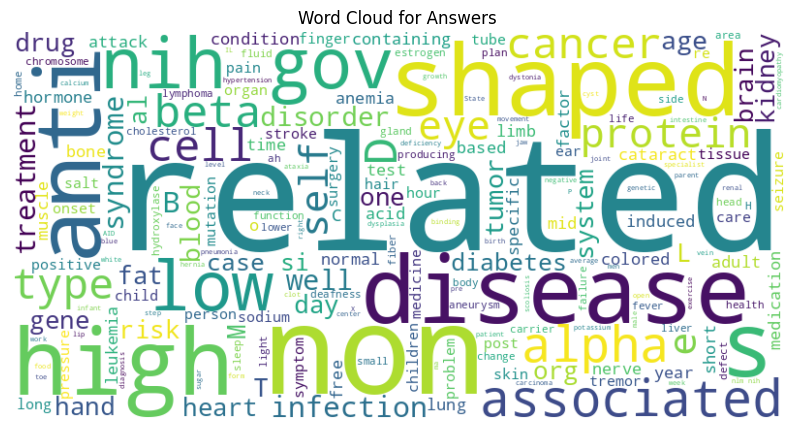

In [ ]:
A = df['Answer'].str.cat(sep = ' ')
awords = A.split()
uawords = set(awords)
uniq_ans = ' '.join(uawords)


wc2 = WordCloud(width = 800, height = 400, background_color='white').generate(uniq_ans)
plt.figure(figsize=(10, 6))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Answers')
plt.show()

In [ ]:
def has_number(string):
    return any(char.isdigit() for char in string)

# Apply the function to each element in the DataFrame
contains_number_mask = df.applymap(has_number)

# Count the total number of occurrences of True (indicating the presence of a number) in each column
total_number_counts = contains_number_mask.sum()

# Display the total number of occurrences for each column
print(total_number_counts)

qtype          0
Question    1454
Answer      8947
dtype: int64


--- \
\
\
### STEP3: Tokenization and removing STOPWORDS using *nltk*.

In [ ]:
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import nltk
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Convert to lowercase
    text = text.lower()
    # Tokenize using NLTK
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

questions = df['Question']
answers = df['Answer']
qtypes = df['qtype']

cleaned_questions = [clean_text(question) for question in questions]
cleaned_answers = [clean_text(answer) for answer in answers]
print(cleaned_questions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['risk lymphocytic choriomeningitis lcm', 'symptoms lymphocytic choriomeningitis lcm', 'risk lymphocytic choriomeningitis lcm', 'diagnose lymphocytic choriomeningitis lcm', 'treatments lymphocytic choriomeningitis lcm', 'prevent lymphocytic choriomeningitis lcm', 'parasites cysticercosis', 'risk parasites cysticercosis', 'diagnose parasites cysticercosis', 'treatments parasites cysticercosis', 'prevent parasites cysticercosis', 'parasites trichuriasis also known whipworm infection', 'risk parasites trichuriasis also known whipworm infection', 'diagnose parasites trichuriasis also known whipworm infection', 'treatments parasites trichuriasis also known whipworm infection', 'prevent parasites trichuriasis also known whipworm infection', 'marine toxins', 'diseases diagnosed marine toxins', 'diseases treated marine toxins', 'common diseases marine toxins', 'prevent poisoning marine toxins', 'government diseases marine toxins', 'else done prevent diseases marine toxins', 'yellow fever vacci

---
\
### STEP4: LEMMATIZATION
Lemmatization is a text normalisation technique used for NLP. It can convert any word's inflections to the base root form. \
--> Why did we need it.? \
* It helps in creating a more concise and meaningful representation of the text data by reducing inflected words to .a common base, which aids in identifying and analyzing topics more accurately (as we topic modelling is the next section and therefore lemmatization in increasing the efficiency).

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
combine = cleaned_questions + cleaned_answers
lemmatizer = WordNetLemmatizer()
tokenized_text = [word_tokenize(doc.lower()) for doc in combine]
tokenized_text = [[lemmatizer.lemmatize(word) for word in doc if word.isalnum()] for doc in tokenized_text]

[nltk_data] Downloading package wordnet to /root/nltk_data...


---
\
### STEP5: TOPIC MODELLING USING LDA
* *Gensim* allows us to perform topic modeling (with LDA) on a large dataset.
* Latent Dirichlet Allocation (LDA) is a probabilistic model used for topic modeling. It captures the underlying topics in a collection of documents by assuming that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics.
* Here we are assuming 5 topics representing a large group of words with each topic containing 4 words in their **context**.
* Probabilities derived during training denotes the likelihood of the word belonging to that topic and such we found subsequent words in each of the 5 different topics and their corresponding likelihoods.

In [ ]:
import gensim
from gensim import corpora

In [ ]:
dictionary = corpora.Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_text]

lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=7)

topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.039*"type" + 0.034*"blood" + 0.033*"genetic" + 0.032*"people"')
(1, '0.024*"may" + 0.024*"treatment" + 0.022*"cancer" + 0.017*"disease"')
(2, '0.057*"symptom" + 0.038*"sign" + 0.029*"frequency" + 0.026*"people"')
(3, '0.034*"gene" + 0.029*"syndrome" + 0.026*"condition" + 0.021*"mutation"')
(4, '0.020*"may" + 0.015*"test" + 0.014*"therapy" + 0.011*"health"')


In [ ]:
for topic_number, topic_info in topics:
    print(f"Topic {topic_number}:")

    words = [pair.split('"')[1] for pair in topic_info.split(' + ')]
    weights = [float(pair.split('*')[0]) for pair in topic_info.split(' + ')]

    for word, weight in zip(words, weights):
        print(f"{word}: {weight}")

    print("\n")

Topic 0:
type: 0.039
blood: 0.034
genetic: 0.033
people: 0.032


Topic 1:
may: 0.024
treatment: 0.024
cancer: 0.022
disease: 0.017


Topic 2:
symptom: 0.057
sign: 0.038
frequency: 0.029
people: 0.026


Topic 3:
gene: 0.034
syndrome: 0.029
condition: 0.026
mutation: 0.021


Topic 4:
may: 0.02
test: 0.015
therapy: 0.014
health: 0.011




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---

In [ ]:
class_counts = df['qtype'].value_counts()
print(class_counts)

information        4535
symptoms           2748
treatment          2442
inheritance        1446
frequency          1120
genetic changes    1087
causes              727
exams and tests     653
research            395
outlook             361
susceptibility      324
considerations      235
prevention          210
stages               77
complications        46
support groups        1
Name: qtype, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---